Annika Chan
word2vec notebook
cleaned python file can be found without notes in word2vec.py

In [2]:
# downloading the packages for the environment

#!pip install gensim
#!pip install matplotlib
#!pip install scikit-learn==1.3.1

In [3]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Creating/implementing the pretrained model. This will be used later to determine biases in language

Data can be found here - https://www.kaggle.com/datasets/adarshsng/googlenewsvectors

In [4]:
model_path = "/Users/anni/Library/CloudStorage/OneDrive-EastsidePreparatorySchool/High School/12th Grade/IP/GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

## Part 1: exploring word2vec

In Word2Vec, each word is represented as a vector in a multi-dimensional space with each index in the vector representing a specific feature and that index value being the mathematical representation of the word described by that feature dimension(e.g. [0.3, 0.8] could be a vector for "grandpa" and the second value represents the age dimension). Words sharing semantic similarities (think of synonyms) will be spacially closer to each other.


Word2Vec has two different architectures: skipgram and continous bag of words (cbow)
* skip gram: based on a target word, the model will predict the words around it
* cbow: based on the words in the sentence around the target word, the model will predict the missing word 


To measure semantic similarities between words, word2vec utilizes cosine similarity. Cosine similarity calculates the cosine of the angle between two vectors. This value ranges from -1 to 1, where 1 means the vectors are in the same direction (high similarity), 0 indicates orthogonality (no similarity), and -1 means they are in opposite directions (high dissimilarity). Essentially it's measuring the cosine of the angle between two word vectors.


Cosine similarity is used over euclidean distance because it is less affected by the magnitude of the vectors. This is crucial since the frequency of words (which could affect vector magnitude/length) does not necessarily imply semantic similarity.


In [5]:
# Finding similar words to loud
word = 'loud'
similar_words = model.most_similar(word, topn=10)
print(f"Words similar to {word}:")

for word, score in similar_words:
    print(f"\t{word} - {score}\n")

Words similar to loud:
	noisy - 0.6621273159980774

	loudly - 0.636400580406189

	fer_cryin - 0.6316129565238953

	deafening - 0.6294395327568054

	Loud - 0.6140207052230835

	loudest - 0.5992903113365173

	obnoxiously_loud - 0.5985252261161804

	ear_splitting - 0.597548246383667

	screeching_noises - 0.5830792188644409

	muffled - 0.5812103152275085



In [6]:
# Finding similar words to amazon
word = 'amazon'
similar_words = model.most_similar(word, topn=10)
print(f"Words similar to {word}:")

for word, score in similar_words:
    print(f"\t{word} - {score}\n")

Words similar to amazon:
	itunes - 0.5846980810165405

	play.com - 0.5455037951469421

	cli - 0.543582022190094

	adobe_acrobat - 0.5393003821372986

	amiga - 0.5359835624694824

	canada - 0.5305779576301575

	Amazon - 0.5263347625732422

	sony - 0.5243285298347473

	dvd - 0.5242242813110352

	bluray - 0.5225474834442139



In [9]:
# Finding similar words to samoyed
word = 'therefore'
similar_words = model.most_similar(word, topn=10)
print(f"Words similar to {word}:")

for word, score in similar_words:
    print(f"\t{word} - {score}\n")

Words similar to therefore:
	consequently - 0.7405011057853699

	hence - 0.702417254447937

	moreover - 0.6448609232902527

	Therefore - 0.6114173531532288

	furthermore - 0.6039420366287231

	thus - 0.5615307092666626

	Consequently - 0.5579942464828491

	Hence - 0.5381782650947571

	Thirdly - 0.5330169200897217

	because - 0.5318125486373901



Plotting random words that have some relation and looking at how they are on a graph.
First I'm creating an array of words to visualize. Then I'm looping through to get the actual numerical vectors for each word along with their labels (which should be the word). then using those I can plot the words on a graph

Note: because this plot is 2D we cannot completely accurately visualize the semantic representations

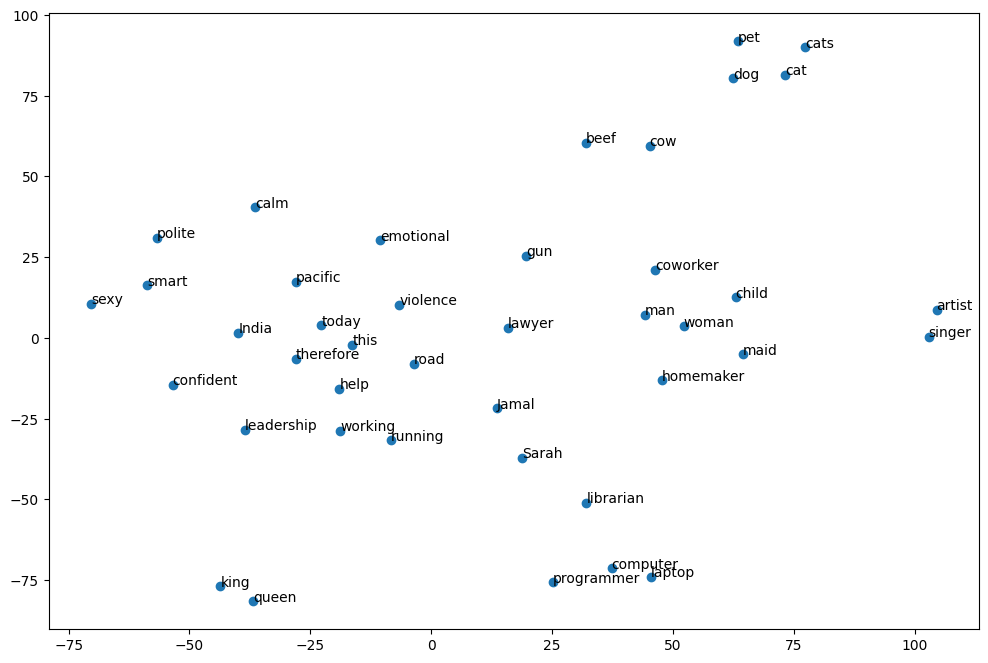

In [11]:
# Making graphs and visualizations

# https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim
# for help with visualization

# Figure 1: A 2D graph of word-vectors in relation to each other
#List of specific words to visualize
specific_words = ["king", "queen", "man", "woman", "computer", "laptop", "coworker", "cat", "dog", "pet", "child", "working", "cats", "lawyer","singer", "artist", "librarian", "programmer", "maid", "homemaker", "leadership", "sexy", "emotional", "calm", "smart", "polite", "confident", "this", "therefore", "help", "running", "gun", "violence", "Jamal", "Sarah", "India", "road", "cow", "beef", "today", "pacific"]

#Extract vectors for the specific words
word_vectors = np.array([model[word] for word in specific_words if word in model])

# Extract vectors for the specific words and pair them with their labels
word_label_pairs = [(word, model[word]) for word in specific_words if word in model.key_to_index]
words_to_plot = [pair[0] for pair in word_label_pairs] # the words/labels to plot
vectors_to_plot = np.array([pair[1] for pair in word_label_pairs]) # the actual mathematical vectors to be plotted




# Apply t-SNE for dimensionality reduction to make it 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=min(5, len(word_vectors) - 1))
Y = tsne.fit_transform(vectors_to_plot)

# Plot the results as a graph
plt.figure(figsize=(12, 8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words_to_plot, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()

## Part 2: Exploring Gender Bias in Words

One way we can do this is by doing vector math. We can do vector addition and subtraction to get to new vectors. Some of my results are located in tracker.xlsx sheet.

In [12]:
print("testing vector math:")
# Trying math to see most similar single word
# ex: king + woman - man should be queen
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"\n\t the result is: {result}")

testing vector math:

	 the result is: [('queen', 0.7118192911148071)]


In [19]:
# What about looking another word?
result = model.most_similar(positive=['CEO', 'he'], negative=['she'], topn=10)
print(f"\n\t the result is: {result}")


	 the result is: [('Chief_Executive_Officer', 0.691335916519165), ('COO', 0.6871274709701538), ('chief_executive', 0.6835318207740784), ('Chief_Operating_Officer', 0.6726173162460327), ('Chief_Executive', 0.6467347741127014), ('Chairman', 0.6230553388595581), ('chairman', 0.5836375951766968), ('ceo', 0.5829241871833801), ('Managing_Director', 0.5804635286331177), ('CTO', 0.5742257237434387)]


In [20]:
# Speeding the process up by just looping through an array and printing out the first result:

traits = ["nurturing", "loyal", "strong", "kind", "honest", "independent", "leadership", "sexy", "emotional", "calm", "smart", "polite", "confident", "agreeable", "assertive", "passive", "dominant", "competitive", "hardworking", "cute", "talented"]
for x in traits:
    new_trait = model.most_similar(positive=[x, 'he'], negative=['she'], topn=1)
    print(x + f" - 'she' + 'he': {new_trait}\n")

nurturing - 'she' + 'he': [('nurture', 0.5628977417945862)]

loyal - 'she' + 'he': [('fiercely_loyal', 0.5910407900810242)]

strong - 'she' + 'he': [('solid', 0.5874135494232178)]

kind - 'she' + 'he': [('sort', 0.6544800400733948)]

honest - 'she' + 'he': [('dignity_Aujali', 0.5113795399665833)]

independent - 'she' + 'he': [('indepedent', 0.48129671812057495)]

leadership - 'she' + 'he': [('leader', 0.5210046172142029)]

sexy - 'she' + 'he': [('suave', 0.5243145227432251)]

emotional - 'she' + 'he': [('Emotional', 0.5070326924324036)]

calm - 'she' + 'he': [('calmness', 0.5488001704216003)]

smart - 'she' + 'he': [('shrewd', 0.49839869141578674)]

polite - 'she' + 'he': [('courteous', 0.5959535837173462)]

confident - 'she' + 'he': [('optimistic', 0.5900174379348755)]

agreeable - 'she' + 'he': [('amenable', 0.5238919854164124)]

assertive - 'she' + 'he': [('forceful', 0.5059183835983276)]

passive - 'she' + 'he': [('passively', 0.4494434595108032)]

dominant - 'she' + 'he': [('domin

There are some interesting ones! For example:
'smart' - 'she' + 'he' = 'shrewd'? --> (having or showing sharp powers of judgment; astute.) --> shrewd feels more knowing and menacing than just smart
'cute' - 'she' + 'he' = 'goofy'? --> could this imply that men don' tneed to look as good and be more personable compared to women?
'sexy' - 'she' + 'he' = 'suave'? --> (dictionary def: charming, confident, and elegant (typically used of a man)).
'talented' - 'she' + 'he' = 'supremely_talented' --> why include supremely?

Overall, it's hard to see if there are gender biases just off vector math alone since we'd have to be aware of the stereotypes and micro-stereotypes as well as inherient biases that we already hold. So another way we can look for potential bias is through visualization.